# Multiple Linear Regression
## Bike Sharing Demand

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Loading and Understanding the Data

In [14]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [15]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [16]:
## reading data
bike_data = pd.read_csv('day.csv')

In [17]:
# Check the head of the dataset
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the bike dataframe

In [18]:
bike_data.shape

(730, 16)

In [19]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [20]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Since the difference between mean and median is not much , we can conclude that data has no outliers

## Step 2: Visualising the Data

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Make a pairplot of all the numeric variables, including cnt which is or traget variable

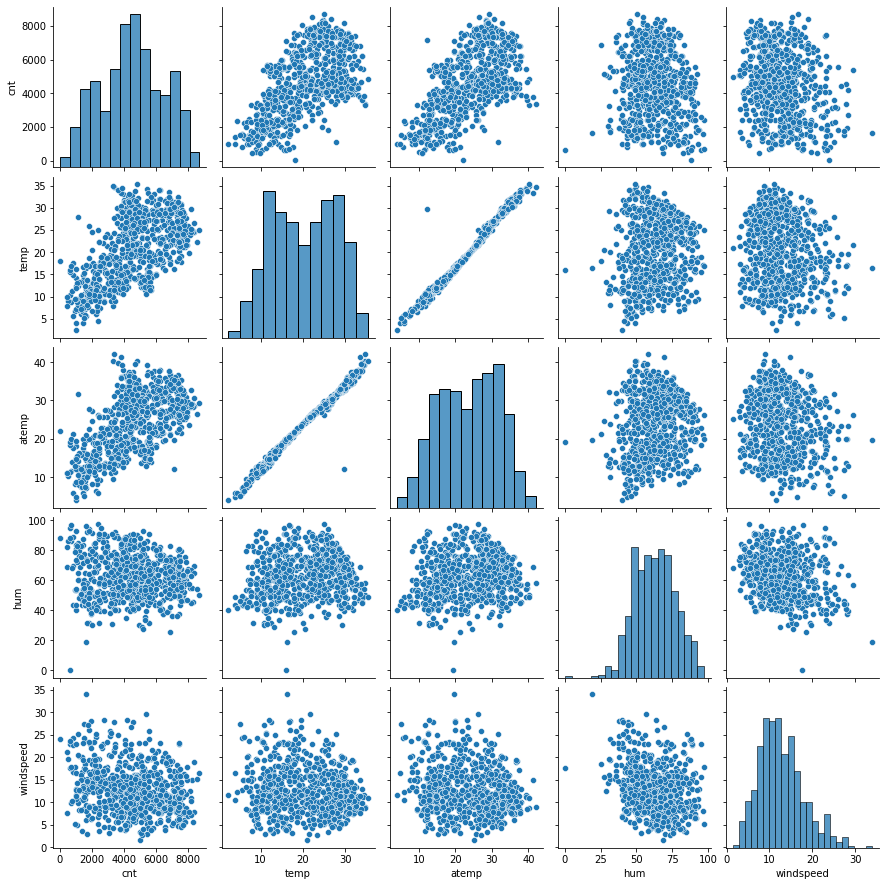

In [22]:
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

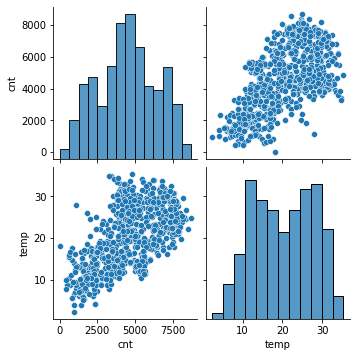

In [23]:
sns.pairplot(data=bike_data,vars=['cnt','temp'])
plt.show()

#### Visualising Categorical Variables with boxplots

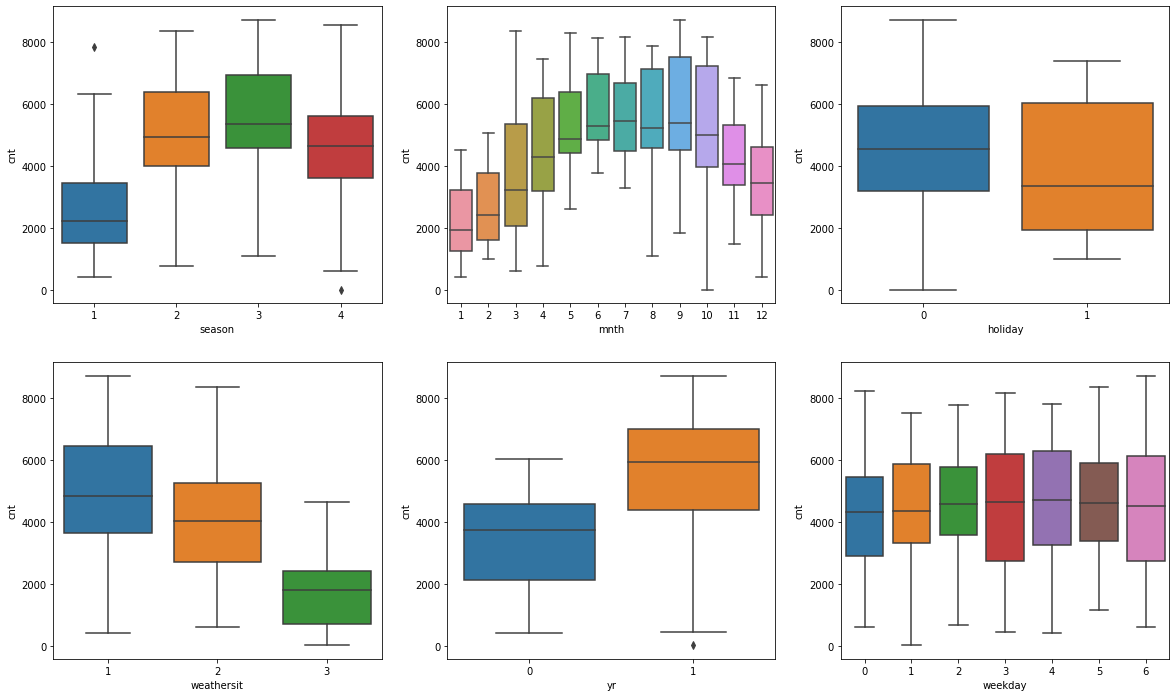

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

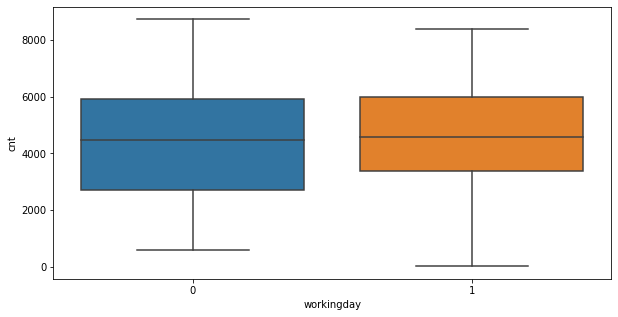

In [25]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.show()

- The count of bike sharing is least for spring
- The number of bike shares incresed in 2019
- The cnt values increases in summer months
- The cnt values ars less during holidays
- The workigday is not bringing signifciant chnages to target variable as medians are almost sae

## Step 3: Data Preparation

In [26]:
## dropping columns that are irrelevant for the model - as instant/casual/registered has all values unique
##dteday has only two years data

bike_data.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [27]:
### Converting some numeric values to categorical data
import calendar
bike_data['mnth'] = bike_data['mnth'].apply(lambda x: calendar.month_abbr[x])

In [28]:
bike_data['weathersit'] 

0      2
1      2
2      1
3      1
4      1
      ..
725    2
726    2
727    2
728    1
729    2
Name: weathersit, Length: 730, dtype: int64

In [29]:
## maping seasons with lables provided by datadictionary 
bike_data.season = bike_data.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [30]:
## mapping weathersit with lables provided by datadictionary
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [31]:
bike_data.weekday = bike_data.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [32]:
# See the modified dataframe

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [33]:
### Create dummy variables for ordinal variables season , mnth ,weathersit ,weekday
dummy = bike_data[['season','mnth','weekday','weathersit']]

In [34]:
dummy = pd.get_dummies(dummy,drop_first=True )

In [35]:
## adding dummy variables to original dataset
bike_data = pd.concat([dummy,bike_data],axis = 1)

In [36]:
# Now let's see the head of our dataframe.
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
## Original columns needs to be droppped. Dropping columns for which dummy variables were created
bike_data.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

In [38]:
bike_data.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
bike_data.shape

(730, 30)

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [40]:
train, test = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 5 :Rescaling the Features 

In [41]:
scaler = MinMaxScaler()

In [42]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [43]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973


In [44]:
train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.029412,0.343137,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.169124,0.475223,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


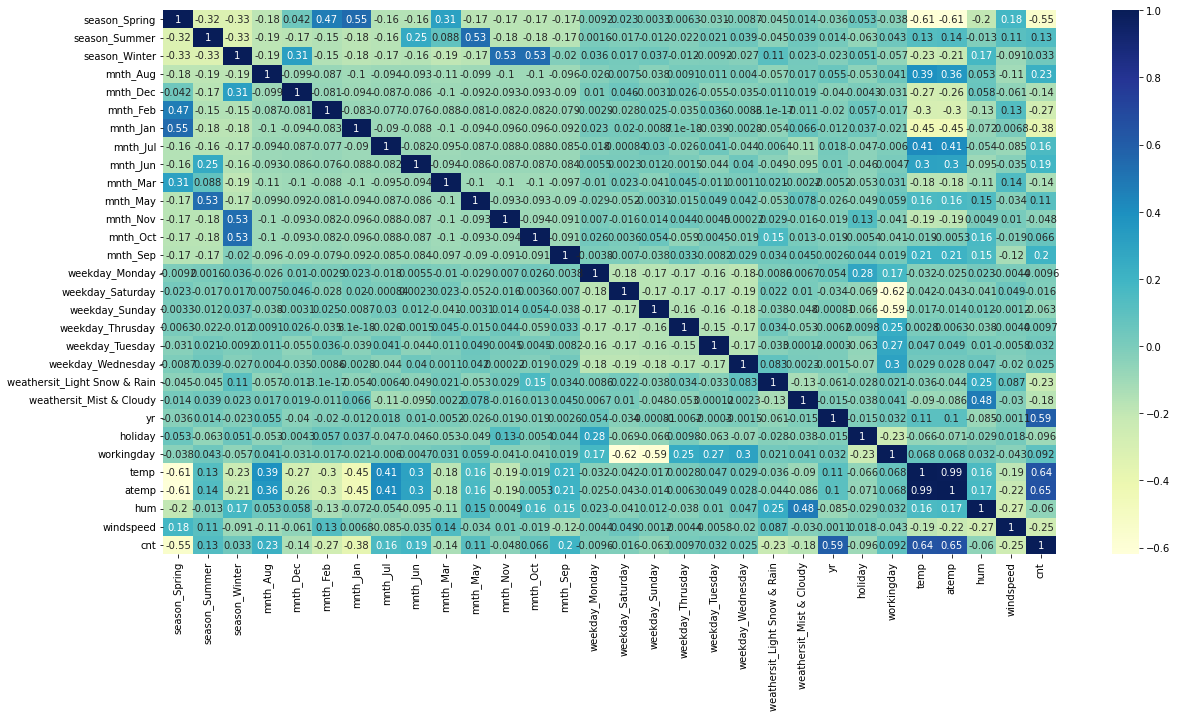

In [45]:
# Create heatmap to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [46]:
y_train = train.pop('cnt')
X_train = train
X_train

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.509887,0.501133,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0.824514,0.762183,0.605840,0.355596
578,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0.863973,0.824359,0.679690,0.187140
53,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0.202618,0.218747,0.435939,0.111379
350,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0.248216,0.223544,0.577930,0.431816


## Step 6: Building a linear model

First start with RFE to find out all important columns. 

In [47]:
# Create RFE
lm = LinearRegression()
lm.fit(X_train, y_train)
#rfe = RFE(lm, n_features_to_select=18)  # selection of features deliberatley is creating issues,hence keep it default
rfe = RFE(lm)  
rfe = rfe.fit(X_train, y_train)

In [48]:
#Observer columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 13),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 8),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 11),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 4),
 ('mnth_Nov', False, 15),
 ('mnth_Oct', False, 2),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 16),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Model 1

In [49]:
#Columns selected by RFE. We will start with these columns for model buiding and do manual elimination eventually
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [50]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

In [51]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [52]:
X_train_rfe 

,season_Spring,season_Summer,season_Winter,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,1,0,1,0.509887,0.575354,0.300794
576,0,0,0,1,0,0,0,0,1,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,1,0,1,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,1,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,1,0,1,1,0,0,0.395666,0.504508,0.188475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,1,0,0,0,0,0,1,1,0,1,0.824514,0.605840,0.355596
578,0,0,0,0,0,0,0,0,1,0,1,0.863973,0.679690,0.187140
53,1,0,0,0,0,0,0,0,0,0,1,0.202618,0.435939,0.111379
350,0,0,1,0,0,1,0,1,0,0,0,0.248216,0.577930,0.431816


In [53]:
# Adding a constant variable to the stats model
 
X_train_rfe = sm.add_constant(X_train_rfe)


In [54]:
# Create a first fitted model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [55]:
# Check the parameters obtained

lm.params

const                           0.239379
season_Spring                  -0.055434
season_Summer                   0.052613
season_Winter                   0.100294
mnth_Jul                       -0.054881
mnth_Sep                        0.081773
weekday_Saturday                0.053203
weathersit_Light Snow & Rain   -0.246332
weathersit_Mist & Cloudy       -0.057847
yr                              0.229738
holiday                        -0.059434
workingday                      0.043216
temp                            0.527819
hum                            -0.159467
windspeed                      -0.180601
dtype: float64

In [56]:
# Print a summary of the linear regression model obtained
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          1.13e-191
Time:                        14:35:11   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [57]:
#X_train_new = X_train_rfe.drop(["holiday"], axis = 1)
#X_train_new will still be X_train_rfe as holidat=y can not be dropped
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [58]:
## dropping holiday since it has highest p but yet p < 0.05. But dropping this brought Adjusted-R square down

### Model 2

In [59]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [60]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [61]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          8.51e-192
Time:                        14:39:06   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2298      0.036      6.451      0.000       0.160       0.300
season_Spring                   -0.0565      0.021     -2.736      0.006      -0.097      -0.016
season_Summer                    0.0530      0.015      3.562      0.000       0.024       0.082
season_Winter                    0.0993      0.017      5.813      0.000       0.066       0.133
mnth_Jul                        -0.0537      0.018     -2.962      0.003      -0.089      -0.018
mnth_Sep                         0.0797      0.017      4.819      0.000       0.047       0.112
weekday_Saturday                 0.0622      0.014      4.438      0.000       0.035       0.090
weathersit_Light Snow & Rain    -0.2455      0.026     -9.383      0.000      -0.297      -0.194
weathersit_Mist & Cloudy        -0.0576      0.010     -5.512      0.000      -0.078      -0.037
yr                               0.2300      0.008     28.580      0.000       0.214       0.246
workingday                       0.0521      0.011      4.790      0.000       0.031       0.073
temp                             0.5279      0.033     15.838      0.000       0.462       0.593
hum                             -0.1578      0.037     -4.209      0.000      -0.232      -0.084
windspeed                       -0.1812      0.025     -7.106      0.000      -0.231      -0.131
==============================================================================
Omnibus:                       71.749   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.211
Skew:                          -0.707   Prob(JB):                     3.67e-41
Kurtosis:                       5.601   Cond. No.                         21.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for multicollinearity

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.34
1,season_Spring,5.02
12,temp,3.62
3,season_Winter,3.49
2,season_Summer,2.61
13,hum,1.91
11,workingday,1.88
6,weekday_Saturday,1.78
8,weathersit_Mist & Cloudy,1.57
4,mnth_Jul,1.49


####  VIF that should be less than 5. So there are clearly some variables we need to drop.

In [63]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [64]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,hum,28.41
10,temp,16.87
9,workingday,4.71
12,windspeed,4.70
0,season_Spring,4.18
2,season_Winter,3.40
1,season_Summer,2.83
7,weathersit_Mist & Cloudy,2.28
8,yr,2.08
5,weekday_Saturday,1.84


### Model 3 

In [66]:
### dropping hum from the model
X_train_new = X_train_rfe.drop(['hum'], axis=1)

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [68]:
# Check the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 07 Feb 2022   Prob (F-statistic):          5.73e-189
Time:                        14:47:59   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [69]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,58.73
1,season_Spring,4.96
12,temp,3.38
3,season_Winter,3.36
2,season_Summer,2.59
11,workingday,1.87
6,weekday_Saturday,1.77
4,mnth_Jul,1.48
5,mnth_Sep,1.29
10,holiday,1.16


## Step 7: Residual Analysis of the train data

 Check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [70]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

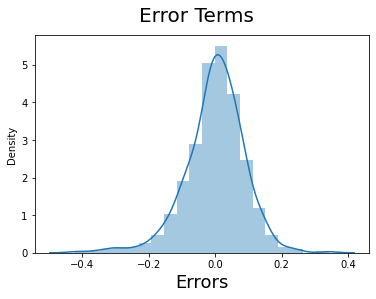

In [71]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. third model.

#### Applying the scaling on the test sets

In [72]:
num_vars = ['cnt','hum','windspeed','temp','atemp']


test[num_vars] = scaler.transform(test[num_vars])

In [73]:
test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.027397,0.319635,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.163612,0.467403,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


#### Dividing into X_test and y_test

In [74]:
y_test = test.pop('cnt')
X_test = test

In [75]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [76]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         219 non-null    float64
 1   season_Spring                 219 non-null    uint8  
 2   season_Summer                 219 non-null    uint8  
 3   season_Winter                 219 non-null    uint8  
 4   mnth_Jul                      219 non-null    uint8  
 5   mnth_Sep                      219 non-null    uint8  
 6   weekday_Saturday              219 non-null    uint8  
 7   weathersit_Light Snow & Rain  219 non-null    uint8  
 8   weathersit_Mist & Cloudy      219 non-null    uint8  
 9   yr                            219 non-null    int64  
 10  holiday                       219 non-null    int64  
 11  workingday                    219 non-null    int64  
 12  temp                          219 non-null    float64
 13  wind

In [77]:
# Making predictions using the fourth model

y_pred = lm.predict(X_test)

In [78]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.807632599438969

In [79]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.009136645151415438

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

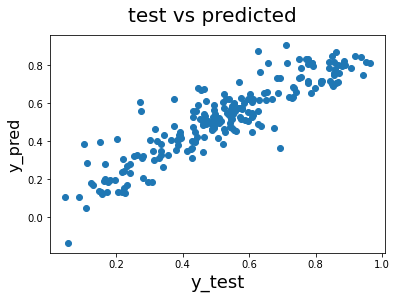

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('test vs predicted', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [81]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,14))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param


,Variables,Coefficient value
index,,
12,temp,0.492017
9,yr,0.233626
0,const,0.157668
3,season_Winter,0.085870
5,mnth_Sep,0.075781
6,weekday_Saturday,0.058008
2,season_Summer,0.046496
11,workingday,0.046259
4,mnth_Jul,-0.049971


##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient.
- Followed by weathersit_Light Snow & Rain.
- Bike rentals is more for the month of september
- The rentals reduce during holidays


This indicates that the bike rentals is majorly affected by temperature,season, month and year and is inversely affected by holiday